# HW3 - Image Clustering

## Installs and downloads:

In [1]:
! wget https://raw.githubusercontent.com/inder123/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml

from google.colab import drive
drive.mount('/content/gdrive')

! pip install face_recognition
 

--2022-06-09 16:19:00--  https://raw.githubusercontent.com/inder123/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1254733 (1.2M) [text/plain]
Saving to: ‘haarcascade_frontalface_default.xml’

haarcascade_frontal 100%[===================>]   1.20M  --.-KB/s    in 0.07s   

2022-06-09 16:19:00 (18.1 MB/s) - ‘haarcascade_frontalface_default.xml’ saved [1254733/1254733]

Mounted at /content/gdrive
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 100.1 MB 25 kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566186 sha256=b5a2ac7e282147c5d

In [5]:
#images_drive - dictionary with the paths for the images (from drive)

#read files from drive 

import os
from os import listdir
from os.path import isfile, join

images_drive = {}

for root, dirs, files in os.walk('/content/gdrive/MyDrive/hw3-trees/photos'):
   path = root.split(os.sep)
   for index, file in enumerate(files):
      im2 = [ f for f in listdir(root) if isfile(join(root,f)) ]
      images_drive[index] = join(root,im2[index])


In [6]:
pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Preprocess:

In [23]:

import cv2
import matplotlib.pyplot as plt

#this function receives a photo and saves it into drive
def save_to_drive(photo, ind):
  cv2.imwrite('/content/gdrive/MyDrive/hw3-trees/faces_photos/' + str(ind) + '.jpg',photo)

#extract and detect faces from each photo - save it into faces_photos in drive 
def per_image(images):
  # Load the cascade
  photos = []
  face_ind = 1
  for image in images:
    imgs_coor = []
    cropped_imgs = []
    face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
    # Read the input image
    img = cv2.imread(image)
    # Convert into grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Detect faces
    faces = face_cascade.detectMultiScale(gray, 1.1, 4)
    color = (255, 0, 0)
    # Draw rectangle around the faces
    for (x, y, w, h) in faces:
        cv2.rectangle(img, (x, y), (x+w, y+h),color, 2)
        imgs_coor.append((x, y,w, h))
        cropped_img = img[y:y+h, x:x+w]
        save_to_drive(cropped_img, face_ind)
        face_ind +=1
        cropped_imgs.append(cropped_img)
    photo_dct = {"imgs_coor":imgs_coor, "cropped_imgs": cropped_imgs, "img": img}
    photos.append(photo_dct)
  return photos



In [24]:

images_paths = list(images_drive.values())
x = per_image(images_paths)

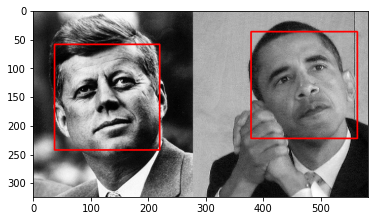

In [36]:
#Show example of photos

import matplotlib.pyplot as plt
plt.imshow(x[24]['img'])

In [37]:
#Count the amount of faces

faces_count = 0
for photo in x:
  amount_of_faces = len(photo["cropped_imgs"])
  faces_count += amount_of_faces

print("Amount of faces: " + str(faces_count))




Amount of faces: 425


In [38]:

all_cropped_imgs = []
for photo in x:
  for cropped_img in photo["cropped_imgs"]:
    all_cropped_imgs.append(cropped_img)




In [39]:
#extract all cropped_imgs which are real faces!
import face_recognition

def save_to_drive_cropped(photo, ind):
  cv2.imwrite('/content/gdrive/MyDrive/hw3-trees/cropped_faces/' + str(ind) + '.jpg',photo)


real_cropped_imgs = []
i=0 #save the location in the original array 

for cropped_img in all_cropped_imgs:
  if face_recognition.face_landmarks(cropped_img): #checks if it's a real face
    real_cropped_imgs.append((cropped_img))
    save_to_drive_cropped(cropped_img, i)
    i+=1

In [40]:
# Features vector

features_vecs = [] # for each image this list saves the features vec

for img in real_cropped_imgs:
  vec = face_recognition.face_encodings(img)
  features_vecs.append(vec[0])
 


In [41]:
print("Amount of recognized faces: " + str(len(features_vecs)))


Amount of recognized faces: 256


In [42]:
# extraced_features - Store as dataframe
import pandas as pd

extraced_features = pd.DataFrame(data=features_vecs, columns = ['feature' + str(i+1) for i in range(128)])

In [43]:
extraced_features

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature119,feature120,feature121,feature122,feature123,feature124,feature125,feature126,feature127,feature128
0,-0.088013,0.057641,0.128711,-0.035866,-0.001921,-0.108993,0.073098,-0.170974,0.116406,-0.114829,...,-0.018376,0.131313,-0.054477,-0.079029,-0.154431,0.025542,0.156581,-0.010232,0.047952,-0.001531
1,-0.129126,0.012036,0.179826,-0.070913,-0.035193,-0.092107,-0.030827,-0.135583,0.111875,-0.113599,...,-0.029986,0.134598,-0.089424,-0.038464,-0.104044,-0.040142,0.103418,-0.021846,0.042351,-0.003954
2,-0.128959,0.035181,0.132539,-0.015508,-0.075044,-0.032696,-0.001816,-0.138974,0.045894,-0.076897,...,0.057562,0.056310,-0.050135,-0.029580,-0.164726,0.001900,0.132045,0.011617,0.008339,-0.007255
3,-0.185583,0.050010,0.129565,-0.013200,-0.017821,-0.116364,0.037916,-0.104340,0.086361,-0.024008,...,-0.039393,0.140449,-0.093718,0.005449,-0.072959,0.030631,0.112603,-0.043262,-0.010879,-0.044550
4,-0.159433,0.053831,0.127629,-0.018094,0.009108,-0.077398,0.069169,-0.155567,0.169310,-0.073191,...,-0.034164,0.102996,-0.076243,-0.000951,-0.066196,0.018819,0.105974,-0.006616,-0.028431,-0.053235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,-0.095462,0.028733,0.042808,-0.104688,-0.145112,-0.035751,-0.044955,-0.062776,0.188410,-0.140486,...,0.002564,0.037526,0.113890,-0.053068,-0.152270,-0.076929,-0.052207,-0.087621,-0.019871,0.060628
252,-0.099200,0.147644,0.048447,-0.008579,-0.031090,-0.114578,0.079152,-0.100536,0.111261,-0.013602,...,0.014465,0.090588,-0.052774,-0.063186,-0.108755,-0.033981,0.056909,-0.065620,0.072168,0.030193
253,-0.054572,0.144717,0.042026,-0.047524,-0.174828,-0.030116,0.043742,-0.050857,0.161908,0.041228,...,-0.012894,0.061016,0.034646,-0.022303,-0.127464,-0.103476,0.087021,-0.037192,0.085752,0.073548
254,0.001321,0.075927,0.062660,0.016906,-0.058390,0.016125,0.047055,-0.016587,0.111745,-0.028112,...,0.023837,0.000733,0.001857,-0.032962,-0.129619,-0.142904,0.031431,0.053392,0.045124,0.047843


## Find best K:

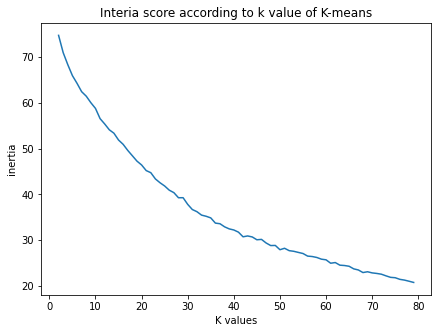

In [44]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

k_lst = range(2,80) #change the range
inertia = []
sils = []
for k in k_lst:
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(extraced_features)
  inertia.append(kmeans.inertia_)
  sil_score = silhouette_score(extraced_features, kmeans.labels_)
  sils.append(sil_score)

plt.figure(figsize=(7,5))
plt.plot(k_lst, inertia)
plt.xlabel('K values')
plt.ylabel('inertia')
plt.title('Interia score according to k value of K-means')
plt.show()

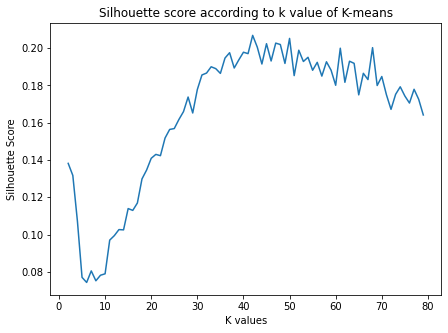

In [45]:
plt.figure(figsize=(7,5))
plt.plot(k_lst, sils)
plt.xlabel('K values')
plt.ylabel('Silhouette Score')
plt.title('Silhouette score according to k value of K-means')
plt.show()

In [46]:
pip install scikit-learn-extra

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 4.9 MB/s 


## Models with the selected K:

In [47]:
from sklearn_extra.cluster import KMedoids

#build models

kmeans_model = KMeans(n_clusters =40)
kmedoid_model  = KMedoids(n_clusters=40)



In [48]:
#kmeans
kmeans_model.fit(extraced_features)
y_kmeans = kmeans_model.predict(extraced_features)

In [49]:
#kmedoids
kmedoid_model.fit(extraced_features)
y_medoids = kmedoid_model.predict(extraced_features)

In [50]:
#Create folders in clusters in drive 
path1 = '/content/gdrive/MyDrive/hw3-trees/clusters/k-means'
path2 = '/content/gdrive/MyDrive/hw3-trees/clusters/k-medoids'

for i in range(40):
    os.mkdir(path1+"/Cluster"+"-" +str(i+1))
    os.mkdir(path2+"/Cluster"+"-" +str(i+1))



In [51]:
# dict - keys: 0..40 - all the clusters num, values - all the indexes of the associated photos from cropped_faces 

clusters_dct_kmeans = {}
clusters_dct_kmedoids = {}


for i in range(len(y_kmeans)):
  cluster_num = y_kmeans[i]
  if cluster_num in clusters_dct_kmeans.keys():
    clusters_dct_kmeans[cluster_num].append(i)
  else:
    clusters_dct_kmeans[cluster_num] = [i]

for i in range(len(y_medoids)):
  cluster_num = y_medoids[i]
  if cluster_num in clusters_dct_kmedoids.keys():
    clusters_dct_kmedoids[cluster_num].append(i)
  else:
    clusters_dct_kmedoids[cluster_num] = [i]




In [53]:
import shutil

#copy each one of the faces for its associated cluster group (directory in drive) - kmeans 

for i in sorted(clusters_dct_kmeans.keys()):
  for image in clusters_dct_kmeans[i]:
    img = str(image) + '.jpg'
    path_src = '/content/gdrive/MyDrive/hw3-trees/cropped_faces'
    path_dest = '/content/gdrive/MyDrive/hw3-trees/clusters/k-means/Cluster-'
    shutil.copy(path_src + '/' + img , path_dest +str(i+1)+ '/' + img)

In [54]:
import shutil
#copy each one of the faces for its associated cluster group (directory in drive) - kmedoids 

for i in sorted(clusters_dct_kmedoids.keys()):
  for image in clusters_dct_kmedoids[i]:
    img = str(image) + '.jpg'
    path_src = '/content/gdrive/MyDrive/hw3-trees/cropped_faces'
    path_dest = '/content/gdrive/MyDrive/hw3-trees/clusters/k-medoids/Cluster-'
    shutil.copy(path_src + '/' + img , path_dest +str(i+1)+ '/' + img)

## Evaluation:

In [55]:
from sklearn.decomposition import PCA
import matplotlib.cm as cm 

#1 - Dimensionality Reduction - Apply PCA

pca = PCA(n_components=2).fit(extraced_features)
pca_features = pca.transform(extraced_features)

In [70]:
# K-means - 1
clusterer = KMeans(n_clusters=40)
cluster_label = clusterer.fit_predict(extraced_features)
colors = cm.nipy_spectral(cluster_label.astype(float)/40)
centers = clusterer.cluster_centers_
pca = PCA(n_components = 2).fit(extraced_features)
centers_pca = pca.transform(centers)
centers_X = centers_pca[:,0]
centers_Y = centers_pca[:,1]
projected = pca.fit_transform(extraced_features)
x = projected[:,0]
y = projected[:,1]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  "X does not have valid feature names, but"


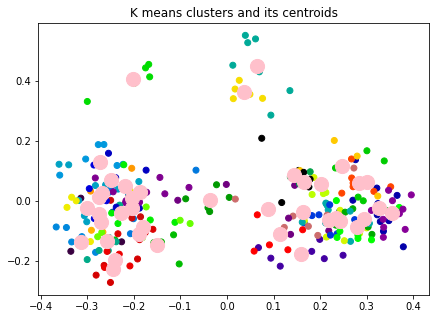

In [71]:
# K-means - 2
plt.figure(figsize=(7,5))
plt.scatter(x,y,color=colors)
plt.scatter(centers_X,centers_Y,color='pink',s=200)


plt.title('K means clusters and its centroids')
plt.show()

In [72]:
from sklearn_extra.cluster import KMedoids

# K-medoids - 1 
clusterer2 = KMedoids(n_clusters=40)
cluster_label2 = clusterer2.fit_predict(extraced_features)
centers2 = clusterer2.cluster_centers_
centers_pca2 = pca.transform(centers2)
centers_X2 = centers_pca2[:,0]
centers_Y2 = centers_pca2[:,1]
projected2 = pca.fit_transform(extraced_features)
x2 = projected2[:,0]
y2 = projected2[:,1]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  "X does not have valid feature names, but"


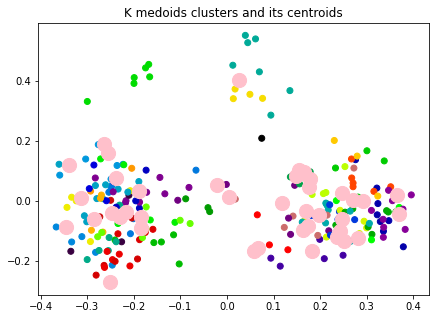

In [73]:
# K-medoids - 2
# K-means - 2
plt.figure(figsize=(7,5))
plt.scatter(x2,y2,color=colors)
plt.scatter(centers_X2,centers_Y2,color='pink',s=200)


plt.title('K medoids clusters and its centroids')
plt.show()